In [100]:
import numpy as np
import matplotlib.pyplot as plt
import utilis as u
import importlib
import model_bonus as m 
import mlp as ml

In [2]:
filename = '/data_batch_1'
X_train, y_train,Y_train = u.load_data(filename, reshape=False, clipping=True)
meanX = np.mean(X_train,axis=1)
stdX = np.std(X_train,axis=1)
X_train = (X_train-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

filename = '/data_batch_2'
X_val, y_val,Y_val = u.load_data(filename, reshape=False, clipping=True)
X_val = (X_val-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

filename = '/test_batch'
X_test, y_test,Y_test = u.load_data(filename, reshape=False, clipping=True)
X_test = (X_test-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

data = {'X_train':X_train, 'Y_train':Y_train, 'y_train':y_train,'X_val':X_val, 'Y_val':Y_val, 'y_val':y_val}

In [3]:
ns = 2*np.floor(X_train.shape[1]/100)
settings = [{"epochs":10, "n_batch":100, "eta_min":0.001,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0,'seed':42},{"epochs":10, "n_batch":100, "eta_min":0.001,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0.01,'seed':42},{"epochs":10, "n_batch":100, "eta_min":0.001,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0.1,'seed':42}]

In [6]:
layers1, hist1 = m.load_network(settings[0],'data_augmentation',True,cycle=-1)
layers2, hist2 = m.load_network(settings[0],'no_data_augmentation',True,cycle=-1)
test_acc = m.get_test_acc(X_test,y_test,layers1)
test_acc2 = m.get_test_acc(X_test,y_test,layers2)
train_loss = hist1.item()['train_loss']
train_cost = hist1.item()['train_cost']
val_loss = hist1.item()['val_loss']
val_cost = hist1.item()['val_cost']
train_acc = hist1.item()['train_acc']
val_acc = hist1.item()['val_acc']

train_loss2 = hist2.item()['train_loss']
train_cost2 = hist2.item()['train_cost']
val_loss2 = hist2.item()['val_loss']
val_cost2 = hist2.item()['val_cost']
train_acc2 = hist2.item()['train_acc']
val_acc2 = hist2.item()['val_acc']
print(f'{np.round(train_acc[-1],5)} & {np.round(val_acc[-1],5)} & {np.round(test_acc,5)} \\')

print(f'{np.round(train_acc2[-1],5)} & {np.round(val_acc2[-1],5)} & {np.round(test_acc2,5)} \\')

0.5084 & 0.435 & 0.442 \
0.7398 & 0.4395 & 0.4473 \


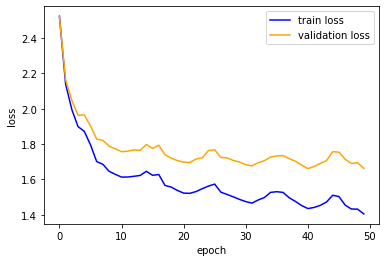

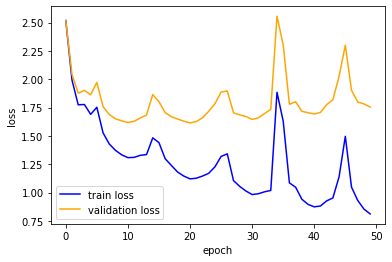

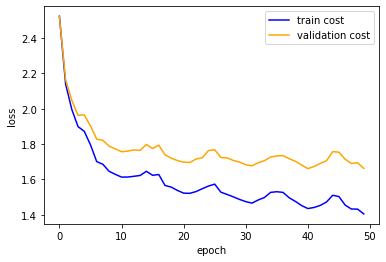

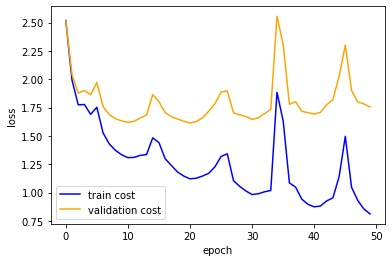

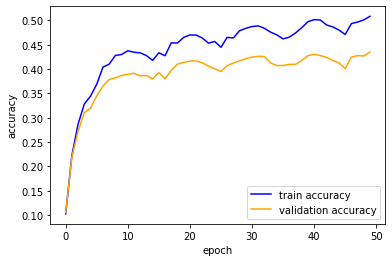

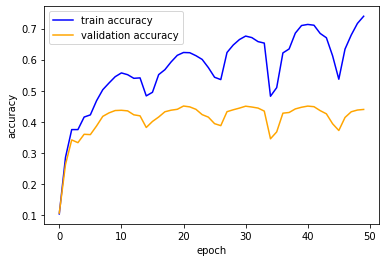

In [7]:

plt.plot(train_loss,color='blue')
plt.plot(val_loss,color='orange')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss','validation loss'])
plt.show()

plt.plot(train_loss2,color='blue')
plt.plot(val_loss2,color='orange')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss','validation loss'])
plt.show()

plt.plot(train_cost,color='blue')
plt.plot(val_cost,color='orange')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend(['train cost','validation cost'])
plt.show()

plt.plot(train_cost2,color='blue')
plt.plot(val_cost2,color='orange')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend(['train cost','validation cost'])
plt.show()

plt.plot(train_acc,color='blue')
plt.plot(val_acc,color='orange')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train accuracy','validation accuracy'])
plt.show()

plt.plot(train_acc2,color='blue')
plt.plot(val_acc2,color='orange')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train accuracy','validation accuracy'])
plt.show()

# ensemble learning

In [9]:
ns = 2*np.floor(X_train.shape[1]/100)
settings = [{"epochs":10, "n_batch":100, "eta_min":0.001,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0,'seed':42},{"epochs":10, "n_batch":100, "eta_min":0.001,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0.01,'seed':42},{"epochs":10, "n_batch":100, "eta_min":0.001,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0.1,'seed':42}]

In [104]:
importlib.reload(m)
layers1, hist1 = m.load_network(settings[0],'ensemble_learning',True,cycle=-1)
test_acc = m.get_test_acc(X_test,y_test,layers1)
ensemble_acc = []
l = []
for i in range(5):
    layers2, hist2 = m.load_network(settings[0],'ensemble_learning',True,cycle=i)
    l.append(layers2)
ensemble_acc = m.ensemble_classification(X_test,y_test,l)
print(f"{np.round(test_acc,5)} & {np.round(ensemble_acc,5)} & {np.round(ensemble_acc-test_acc,5)} \\ ")

0.4473 & 0.4538 & 0.0065 \ 


# different number of hidden units

In [111]:
importlib.reload(m)
settings = [(0.001,50),(0.005,100),(0.01,200),(0.1,400)]
GDparams = {"epochs":10, "n_batch":100, "eta_min":0.001,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':settings[3][0],'seed':42}
layers, hist = m.load_network(GDparams,'test_hidden_units',True,cycle=-1)
train_loss = hist.item()['train_loss']
train_cost = hist.item()['train_cost']
val_loss = hist.item()['val_loss']
val_cost = hist.item()['val_cost']
train_acc = hist.item()['train_acc']
val_acc = hist.item()['val_acc']
test_acc = m.get_test_acc(X_test,y_test,layers)

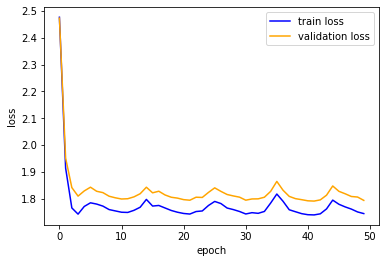

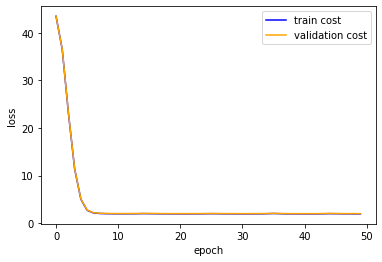

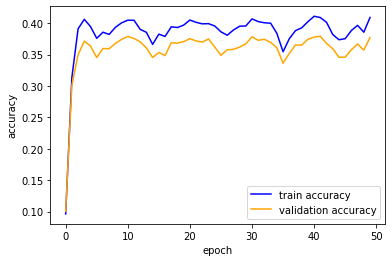

In [112]:
plt.plot(train_loss,color='blue')
plt.plot(val_loss,color='orange')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss','validation loss'])
plt.show()


plt.plot(train_cost,color='blue')
plt.plot(val_cost,color='orange')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train cost','validation cost'])
plt.show()


plt.plot(train_acc,color='blue')
plt.plot(val_acc,color='orange')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train accuracy','validation accuracy'])
plt.show()
